# **Single cell AIR and RNA multiomics Analysis**
       
        -By Dr. Majeed Jamakhani

# Theory


**AIR(Advance Immune cell Receptor):**

AIR key for recognition of antigens and toxis by immune cells

Types:

- Pattern recognition receptors (PRRs): Pathogen-associated molecular patterns (PAMPS)

- Killer activator/inhibitor receptors (KARs/KIRs): Host cells abnormalities

- Complement receptors: Complement proteins

- Fc receptors: Epitope-antibody complex

- Cytokine receptors: Cytokines

- B-cell receptor (BCRs): Epitopes

- T-cell recpetors (TCRs): Linear epitopes bound to the Major Histocompatibility Complex (MHC)


>   Thymus and Bone-marrow called T- and B-cells


**TCR and BCR :**

TCR and BCR interacts with antigens in different ways

- BCR direct recognize soluble or membrane bound antigens

- TCR indirectly recognize , using MHC (surface proteins) molecules

**Functions**
once activated perform many functions
- fighting
- regulating response
- memory by proliferation

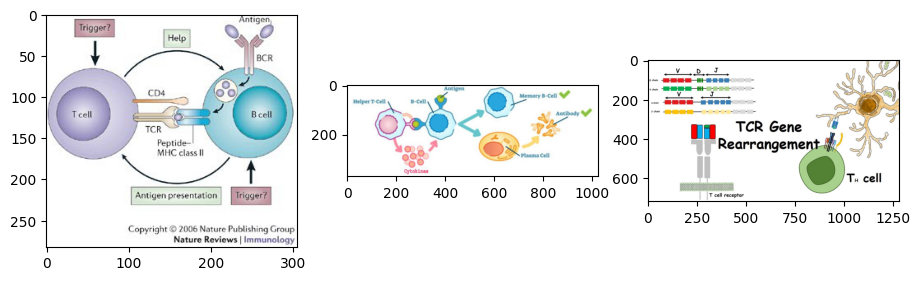

In [ ]:
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 11 ,8

# Image("207px-Jupyter_logo.svg.png")

image1_url = "/content/drive/MyDrive/Data/scAIR_data/tcellbcell.jpg"

image2_url= "/content/drive/MyDrive/Data/scAIR_data/B-Cell-Activation-1024x372.jpg"

image3_url = "/content/drive/MyDrive/Data/scAIR_data/maxresdefault.jpg"

# read images
img_A = mpimg.imread(image1_url)
img_B = mpimg.imread(image2_url )
img_C = mpimg.imread(image3_url )

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
ax[2].imshow(img_C)


The AIR is a protein complex consisting of two chains. Depending on the T cell type, these chains are either called α- and β- or γ- and δ-chain. Similarly, the BCR chains are called heavy and light chain (subtypes: κ and λ). While the α-, γ-, κ-, and λ-chains are formed by their respective V- and J-genes, the remaining chains additionally include their D-gene. For simplicity, we will therefore refer to VJ and VDJ chains

The collection of all receptors forms the AIR repertoire of an individual.

10^20 TCR

10^18 BCR

The sequence diversity is introduced by the V(D)J recombination mechanism:

Combinatorial diversity is introduced by the combination of different V-, (D-,) and J-genes in addition to the combination of different VJ and VDJ chains.

Junctional diversity is achieved by insertion of nucleotides at the gene interfaces.


**CDR3 :**

importance of CDR3:    

In the resulting AIRs, three regions of high variability - the Complementary Determining Regions (CDRs) 1-3 - were detected per chain, where the AIR interacts with its target. The CDR1 and CDR2 are encoded by the V-gene. However, the CDR3 spans over the intersection of V-, (D-,) and J-genes and is therefore the most diverse element of the AIR. Therefore, it is often assumed that the specificity of an AIR is determined mainly by its CDR3 region of the more diverse VDJ chain


**Sequencing of TCR BCR chains:**

- TCR BCR cells isolated by FACS or microfudic
- chains are sequenced = computational reconstruction of different chains based on single cell RNA seq
- TCR chains sequenced by  - TRAPeS, TraCer
- BCR chains sequenced by -  BALDR, BraCer

Disadvantage :    prone to ignore recombinatorial products and alternative splicing products of VDJ region

RAGE-seq helps in this

**Advantages of AIR :**

 >AIR sequence determines the specificity of the individual B- and T-cell


VDJ-sequencing provides us with the nucleotide and thereby also the protein sequence of the AIR paired for both chains, from which the V-, (D-,) J-, and C-gene is determined in addition to the CDR3 sequence


## Clonotype - Analysis



> TCR or BCR undergo clonal expansion (same cells , many numbers)

> This clonal expansion creates - abundance and diversity

> Due to clonal expansion Native T cells become mature or effector T cells

- **clonal competition:** 2 or more clones in expansion competing for same space

- **clonal dominance:** one single clone in more number compare to rest of clonal cells

**Diversity:** Number of different clonotype  in a given space

**Abundance:** Number of cells in one clonotype




**Pieces of evidence for immunodominant clonotype**


**Gene segment Usage:**
During recombination of VDJ genes different segment utilized to form clonotype, this is called Gene segment frequency

**Length of CDR3:** region is different



**Clonotype**

- Detecting identical sequences of VJ CDR3 and VDJ CDR3

- By Measuring distance between sequences

```
ir.pp.ir_dist(adata, sequence="aa")
```


**CLonotype-Network**

```
_ = ir.pl.clonotype_network(
    adata,
    color="patient_id",
    base_size=10,
    label_fontsize=9,
    panel_size=(10, 10),
    legend_fontsize=15,
)

```

**Public Clonotype:** More samples shared same clonotype are called Public clonotype . Useful for general response \ disease

**Private Clonotype:** Samples have different clonotype . Usefule for precision medicne


## AIR + Transcriptomics


> Transcriptome tells cells current state .

> AIR tells cell's specificity and fate upon infection and vaccination



# Example-I

In this we are going to analyse scTCR-RNAseq data

In [ ]:
#@title Install Libraries
%%bash
pip install muon
pip install scanpy
pip install scirpy


In [32]:
#@title Load Libraries

import muon as mu
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from cycler import cycler
from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt


sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

## Data

scirpy supports many formats to load IR data either by -  cellranger 10X , TraCer, AIRR



Data we are using already comes with scirpy package . we can load data as below

```
mdata = ir.datasets.wu2020_3k()

```



In [55]:
#@title Reading raw data

mdata = ir.datasets.wu2020_3k()
mdata


MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	3000 x 30727
      obs:	'cluster_orig', 'patient', 'sample', 'source'
      uns:	'cluster_orig_colors'
      obsm:	'X_umap_orig'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

> As we can see dataset consist of 2 modality data -
- gex : Gene expression data
- airr: Immune Receptor data


> We are going to combine both modalities so we can perform Multiomics analysis





### Data Preprocessing

Data preprocessing of individual modalities are necessary and have to use best practices

> GEX data needs to be done using best preprocessing steps. But here we only use default preprocessing and UMAP coordinates from paper, as we are mainly focusing on TCR, BCR



In [56]:
mdata

MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	3000 x 30727
      obs:	'cluster_orig', 'patient', 'sample', 'source'
      uns:	'cluster_orig_colors'
      obsm:	'X_umap_orig'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

In [57]:
# Look how raw matrix looks
print(mdata["gex"].X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


filtered out 20119 genes that are detected in less than 20 cells
filtered out 10 cells that have less than 200 genes expressed
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [58]:
mdata["gex"].layers["counts"] = mdata["gex"].X
mdata

MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	3000 x 30727
      obs:	'cluster_orig', 'patient', 'sample', 'source'
      uns:	'cluster_orig_colors'
      obsm:	'X_umap_orig'
      layers:	'counts'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

In [59]:
# See whether matrix is Normalized or not

print("========================================")
print(mdata["gex"].X.toarray())
print("========================================")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:


print("========================================")
print(mdata["gex"].X.toarray())
mdata

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	3000 x 30727
      obs:	'cluster_orig', 'patient', 'sample', 'source'
      uns:	'cluster_orig_colors'
      obsm:	'X_umap_orig'
      layers:	'counts'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

In [61]:
#@title Data QC analysis

sc.pp.filter_genes(mdata["gex"],  min_cells= 20)

sc.pp.filter_cells( mdata["gex"] , min_genes= 200 )

sc.pp.normalize_per_cell( mdata["gex"] )


sc.pp.log1p( mdata["gex"] )

sc.pp.highly_variable_genes( mdata["gex"], flavor= "cell_ranger", n_top_genes= 5000 )

sc.tl.pca( mdata["gex"],  svd_solver="arpack")

sc.pp.neighbors( mdata["gex"])



filtered out 20119 genes that are detected in less than 20 cells
filtered out 10 cells that have less than 200 genes expressed
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:03)


In [62]:
print("========================================")
print(mdata["gex"].X.toarray())
mdata

[[0.        0.        0.        ... 1.5817864 0.        2.166453 ]
 [0.        0.        0.        ... 0.8507153 0.        0.       ]
 [0.        0.        0.        ... 0.5422586 0.        1.3557187]
 ...
 [0.        0.        0.        ... 0.        0.9799224 1.4652208]
 [0.        0.        0.        ... 1.2008302 0.        1.500585 ]
 [0.        0.        0.        ... 2.617367  1.3140849 2.9033525]]


MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_umap_orig', 'X_pca'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

### CLuster Annotation

Author already provided UMAP coordinates and annotation , so we use them here

In [63]:
mdata["gex"].obsm["X_umap"] = mdata["gex"].obsm["X_umap_orig"]

mapping = {
    "nan": "other",
    "3.1-MT": "other",
    "4.1-Trm": "CD4_Trm",
    "4.2-RPL32": "CD4_RPL32",
    "4.3-TCF7": "CD4_TCF7",
    "4.4-FOS": "CD4_FOSS",
    "4.5-IL6ST": "CD4_IL6ST",
    "4.6a-Treg": "CD4_Treg",
    "4.6b-Treg": "CD4_Treg",
    "8.1-Teff": "CD8_Teff",
    "8.2-Tem": "CD8_Tem",
    "8.3a-Trm": "CD8_Trm",
    "8.3b-Trm": "CD8_Trm",
    "8.3c-Trm": "CD8_Trm",
    "8.4-Chrom": "other",
    "8.5-Mitosis": "other",
    "8.6-KLRB1": "other",
}
mdata["gex"].obs["cluster"] = mdata["gex"].obs["cluster_orig"].map(mapping)

mdata

MuData object with n_obs × n_vars = 3000 × 30727
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

> When there is multimodal mudata, we need to update mudata in order to take effect of chanages we made for mudata modalities

```
mdata.update()
```

see how Var (features = 30727 ) changes to high;y variable feature set (features = 10608)


In [65]:
mdata.update()
mdata

MuData object with n_obs × n_vars = 3000 × 10608
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      obsm:	'airr'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


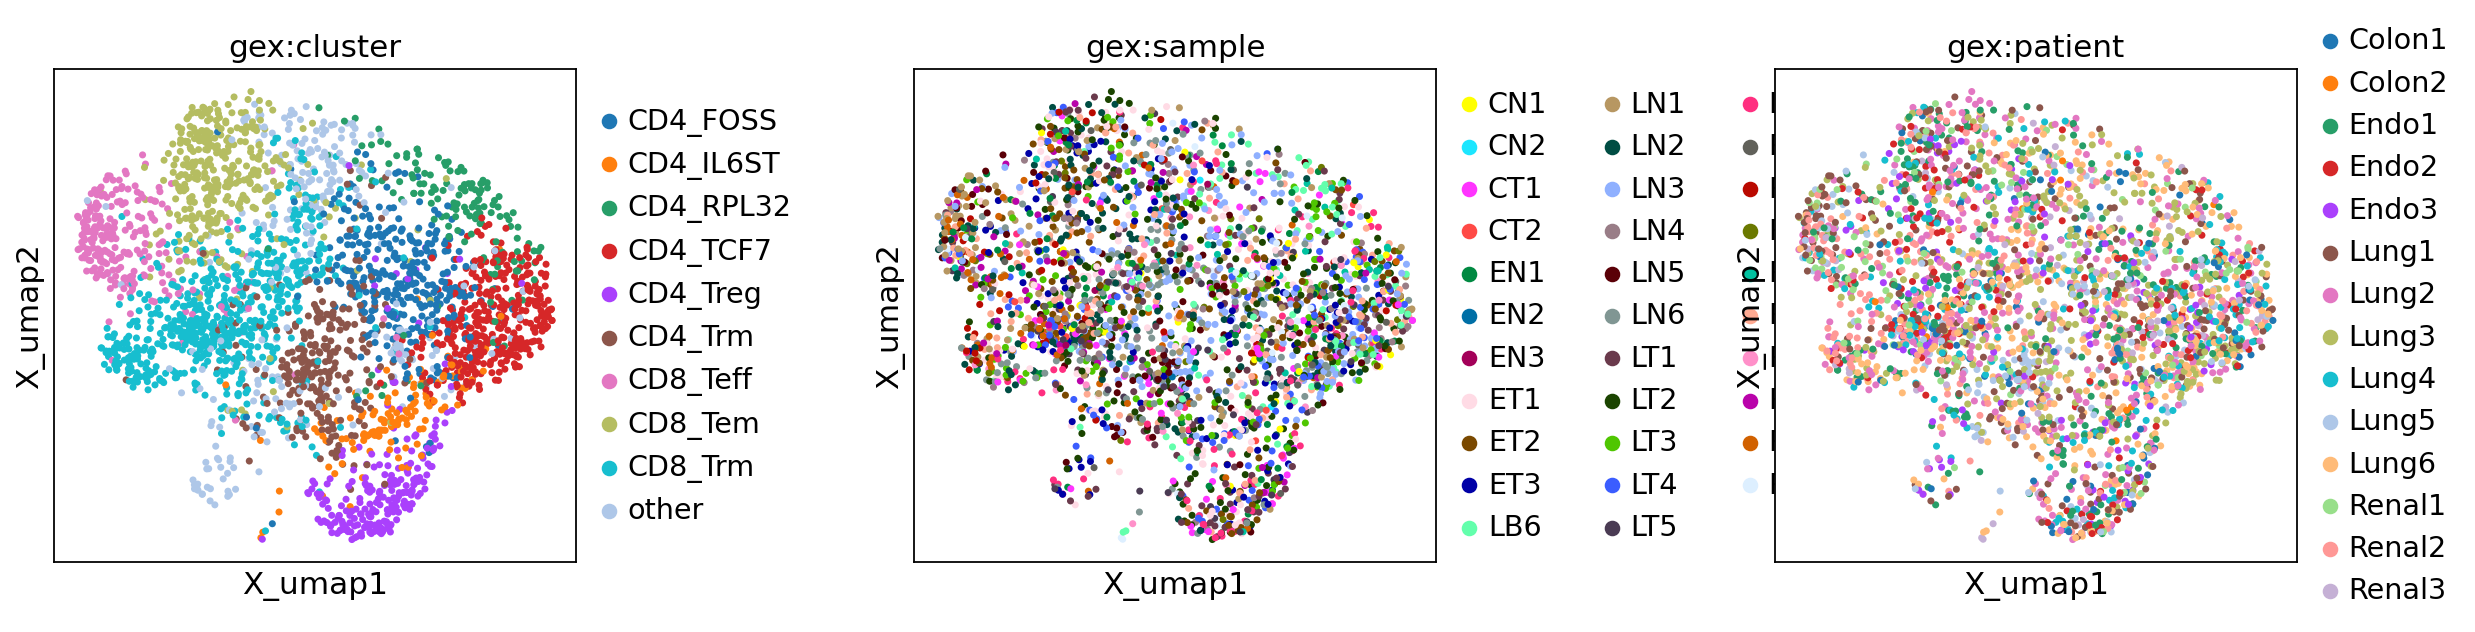

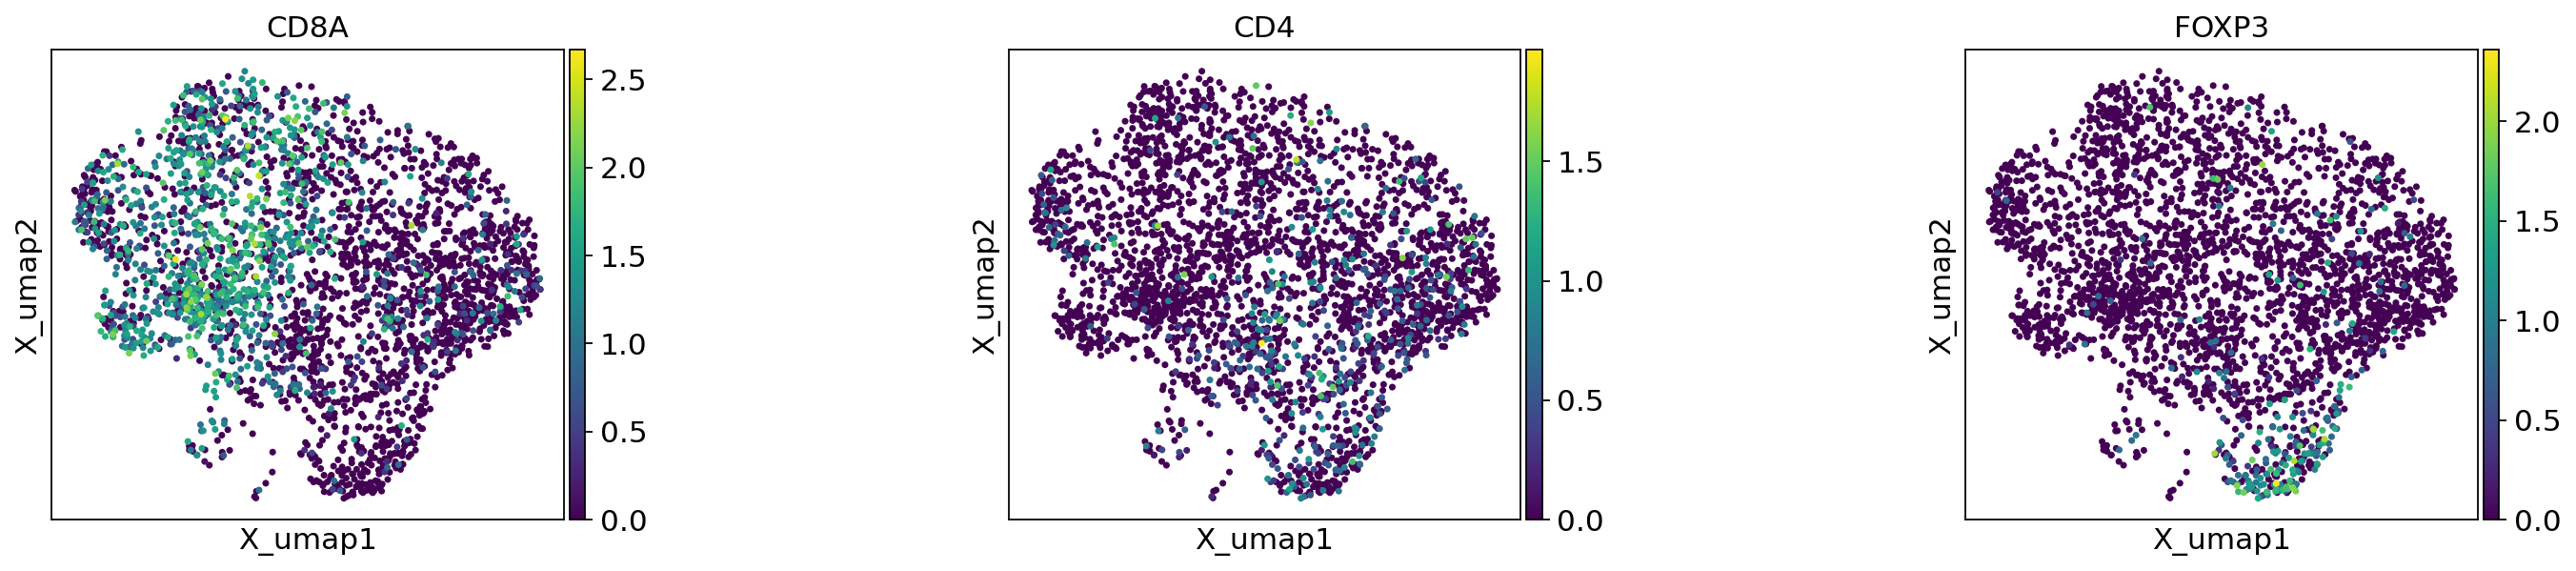

In [69]:
#@title plot UMAO with sample, patient, cluster and T cell Markers

mu.pl.embedding(
    mdata,
    basis= "gex:umap",
    color=["gex:cluster", "gex:sample", "gex:patient"],
    ncols=3,
    wspace=0.5
)


mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["CD8A", "CD4", "FOXP3"],
    ncols=3,
    wspace=0.7
)



## IR data -preprocessing

### Creating chain indices

First step is creating chain indices for recptor data

```
ir.pp.index_chains(mdata)
```


In [71]:
ir.pp.index_chains(mdata)
mdata

  0%|          | 0/1 [00:00<?, ?it/s]

MuData object with n_obs × n_vars = 3000 × 10608
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

### TCR QC


> Cells with TCRs have 2 chains (one pair) Alpha and Beta chains.

> Some times some cells have more than one pair (like 3, 4 , 5 ..etc chains)

> We need to identify this and remove or hide from further downstream analysis

We use summary of IR chains, receptor type (TCR or BCR) and subtype information

chain pairing has:
- orphan chain - single alpha or single beta
- extra chain-  In addition to pair , it has extra chain (VJ or VDJ)
- Multichain more than 2 pairs

```
sc.tl.chain_qc()  

```


In [72]:
#@title IR QC

ir.tl.chain_qc(mdata)

mdata


Stored result in `mdata.obs["airr:receptor_type"]`.
Stored result in `mdata.obs["airr:receptor_subtype"]`.
Stored result in `mdata.obs["airr:chain_pairing"]`.


MuData object with n_obs × n_vars = 3000 × 10608
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [73]:
mdata["gex"].obs.head()

cluster_orig patient sample source  n_genes  n_counts  \
LN1_GTAGGCCAGCGTAGTG-1      4.4-FOS   Lung1    LN1    NAT      582    1188.0   
RN2_AGAGCGACAGATTGCT-1      4.4-FOS  Renal2    RN2    NAT      739    1711.0   
LN1_GTCATTTCAATGAAAC-1      8.2-Tem   Lung1    LN1    NAT     1257    3188.0   
LN2_GACACGCAGGTAGCTG-2    8.6-KLRB1   Lung2    LN2    NAT     1833    5505.0   
LN2_GCACTCTCAGGGATTG-2      4.4-FOS   Lung2    LN2    NAT     2066    6846.0   

                         cluster  
LN1_GTAGGCCAGCGTAGTG-1  CD4_FOSS  
RN2_AGAGCGACAGATTGCT-1  CD4_FOSS  
LN1_GTCATTTCAATGAAAC-1   CD8_Tem  
LN2_GACACGCAGGTAGCTG-2     other  
LN2_GCACTCTCAGGGATTG-2  CD4_FOSS

In [74]:
mdata["airr"].obs.head()

high_confidence  is_cell    clonotype_orig  \
LN1_GTAGGCCAGCGTAGTG-1             True     True     lung1.tn.C223   
RN2_AGAGCGACAGATTGCT-1             True     True  renal2.tnb.C1362   
LN1_GTCATTTCAATGAAAC-1             True     True      lung1.tn.C25   
LN2_GACACGCAGGTAGCTG-2             True     True    lung2.tn.C2452   
LN2_GCACTCTCAGGGATTG-2             True     True    lung2.tn.C5631   

                       receptor_type receptor_subtype chain_pairing  
LN1_GTAGGCCAGCGTAGTG-1           TCR          TRA+TRB    orphan VDJ  
RN2_AGAGCGACAGATTGCT-1           TCR          TRA+TRB   single pair  
LN1_GTCATTTCAATGAAAC-1           TCR          TRA+TRB   single pair  
LN2_GACACGCAGGTAGCTG-2           TCR          TRA+TRB    orphan VDJ  
LN2_GCACTCTCAGGGATTG-2           TCR          TRA+TRB   single pair

<Axes: title={'center': 'Number of cells in airr:receptor_subtype by gex:source'}, xlabel='airr:receptor_subtype', ylabel='Number of cells'>

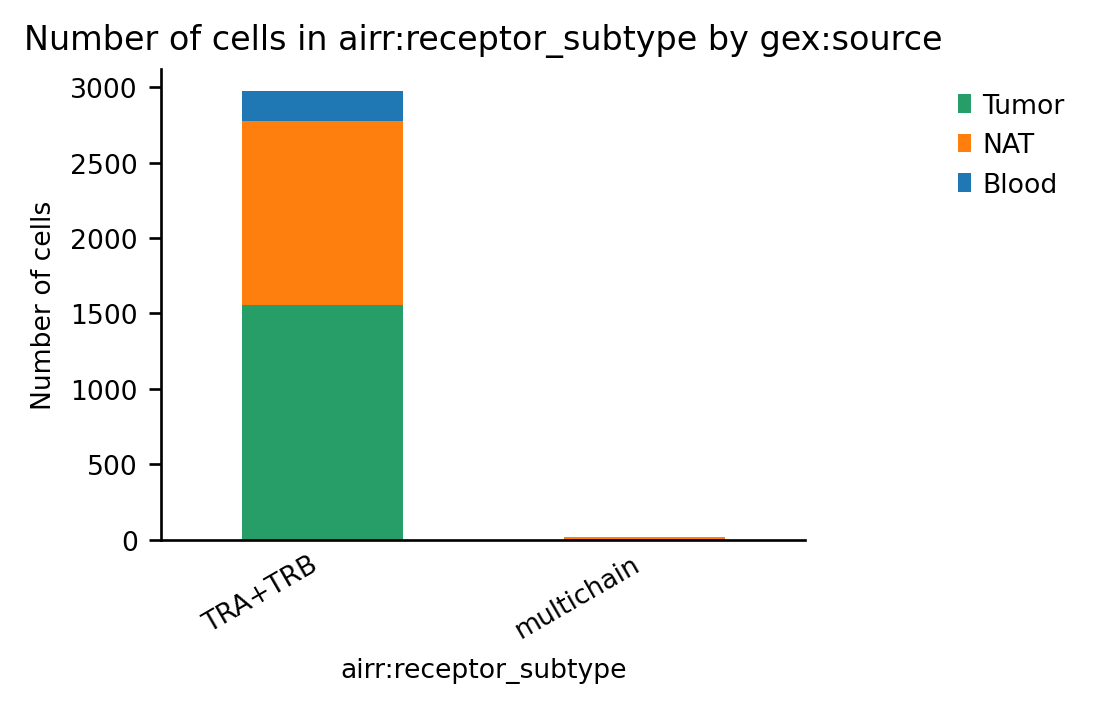

In [75]:
ir.pl.group_abundance(
    mdata, groupby="airr:receptor_subtype", target_col="gex:source"
)

<Axes: title={'center': 'Number of cells in airr:chain_pairing by gex:source'}, xlabel='airr:chain_pairing', ylabel='Number of cells'>

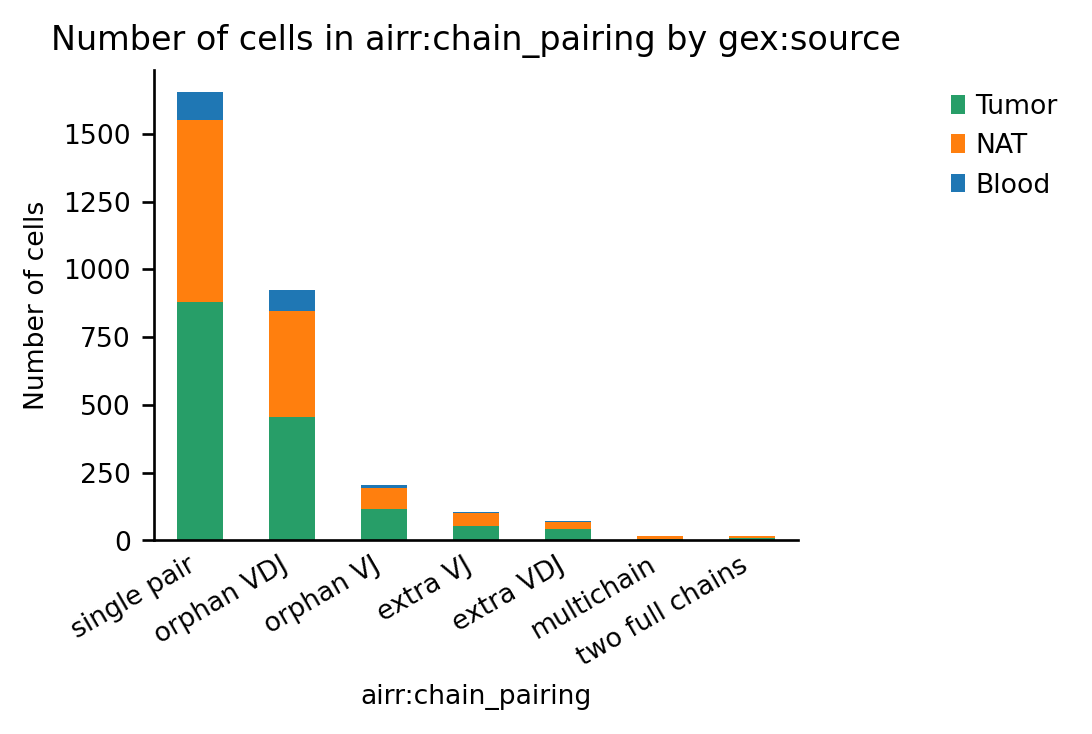

In [77]:
ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:source")


In [78]:
#@title Percentage of Productive TCRs

print(
    "Fraction of cells with more than one pair of TCRs: {:.2f}".format(
        np.sum(
            mdata.obs["airr:chain_pairing"].isin(
                ["extra VJ", "extra VDJ", "two full chains", "multichain"]
            )
        )
        / mdata["airr"].n_obs
    )
)

Fraction of cells with more than one pair of TCRs: 0.07


In [79]:
mdata

MuData object with n_obs × n_vars = 3000 × 10608
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


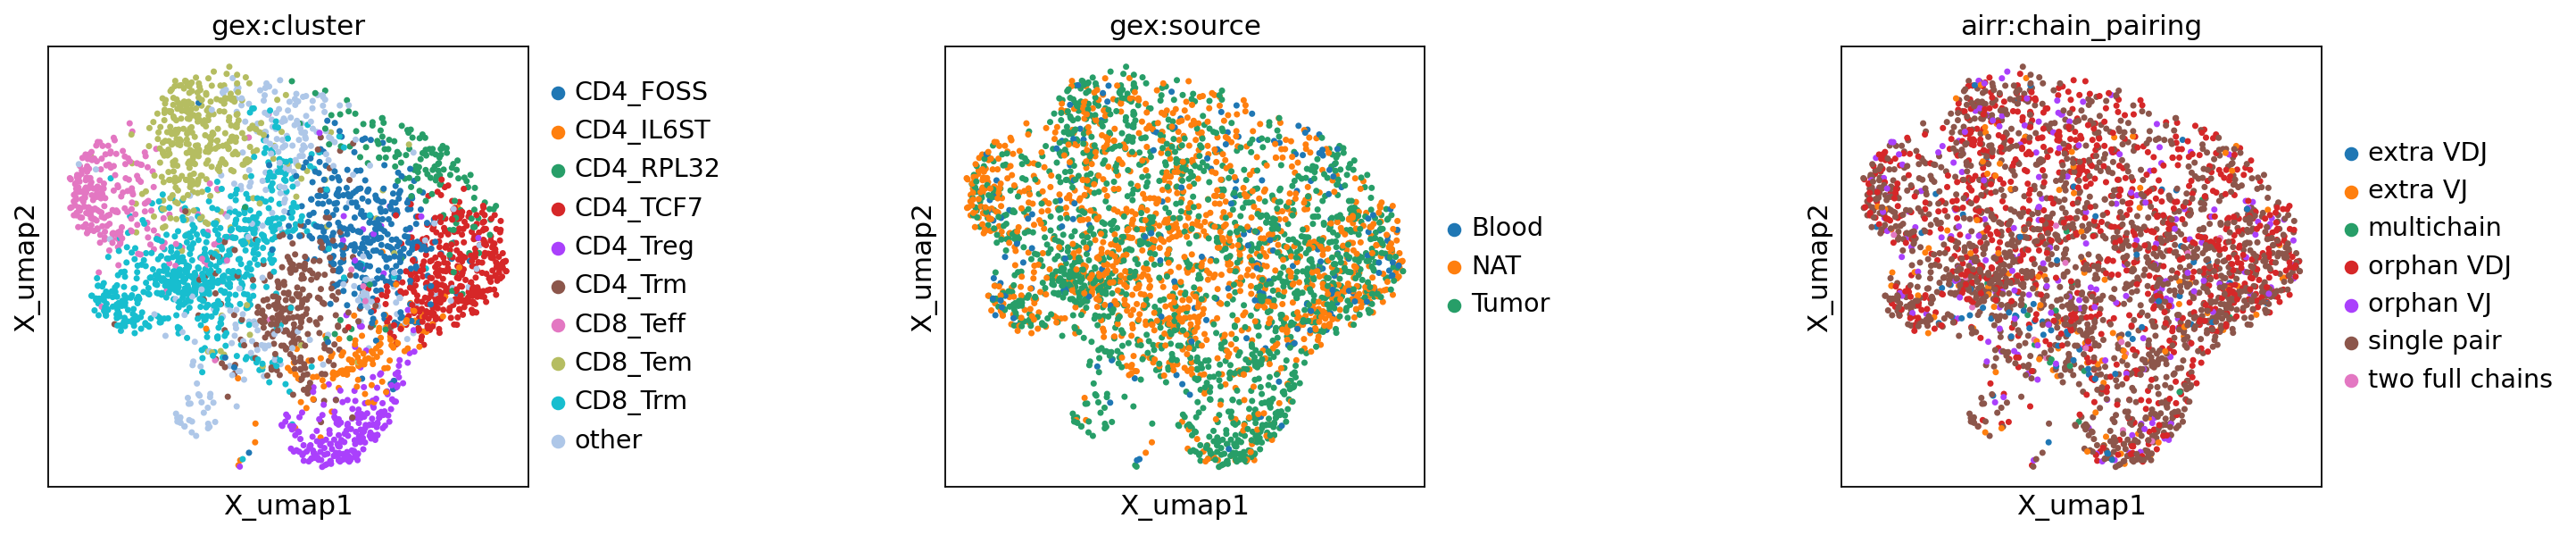

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


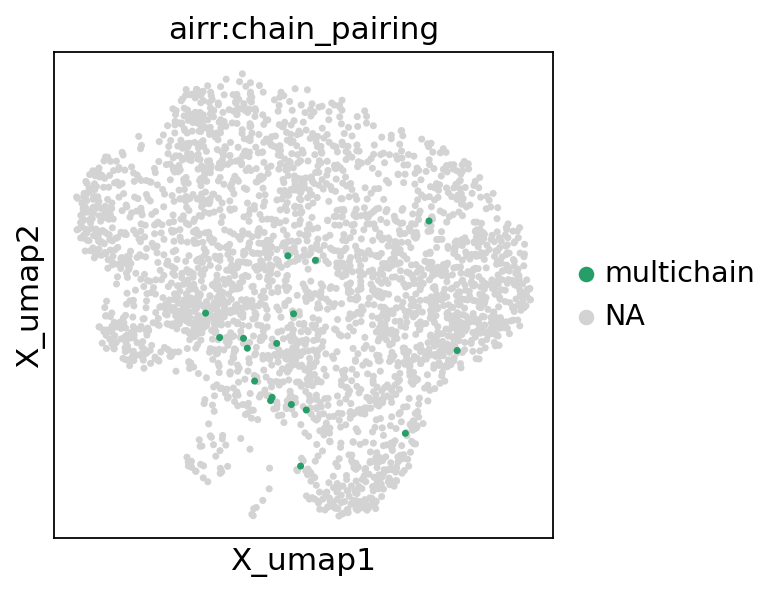

In [85]:
#@title Multichain -cells visualize

mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=[ "gex:cluster", "gex:source", "airr:chain_pairing"],
    ncols=3,
    wspace=0.7
)

mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color=["airr:chain_pairing"],
    groups="multichain",
    ncols=3,
    wspace=0.7
)


In [86]:
mdata

MuData object with n_obs × n_vars = 3000 × 10608
  2 modalities
    gex:	2990 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors', 'gex:source_colors', 'airr:chain_pairing_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	3000 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [87]:
#@title Filter IR data without multichain and don't have one chain

mu.pp.filter_obs(mdata, "airr:chain_pairing", lambda x: x != "multichain")

mu.pp.filter_obs(
    mdata, "airr:chain_pairing", lambda x: ~np.isin(x, ["orphan VDJ", "orphan VJ"])
)

mdata

MuData object with n_obs × n_vars = 1845 × 10608
  2 modalities
    gex:	1844 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors', 'gex:source_colors', 'airr:chain_pairing_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	1845 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

> As we can see cells reduced from
3000 to 1844

>


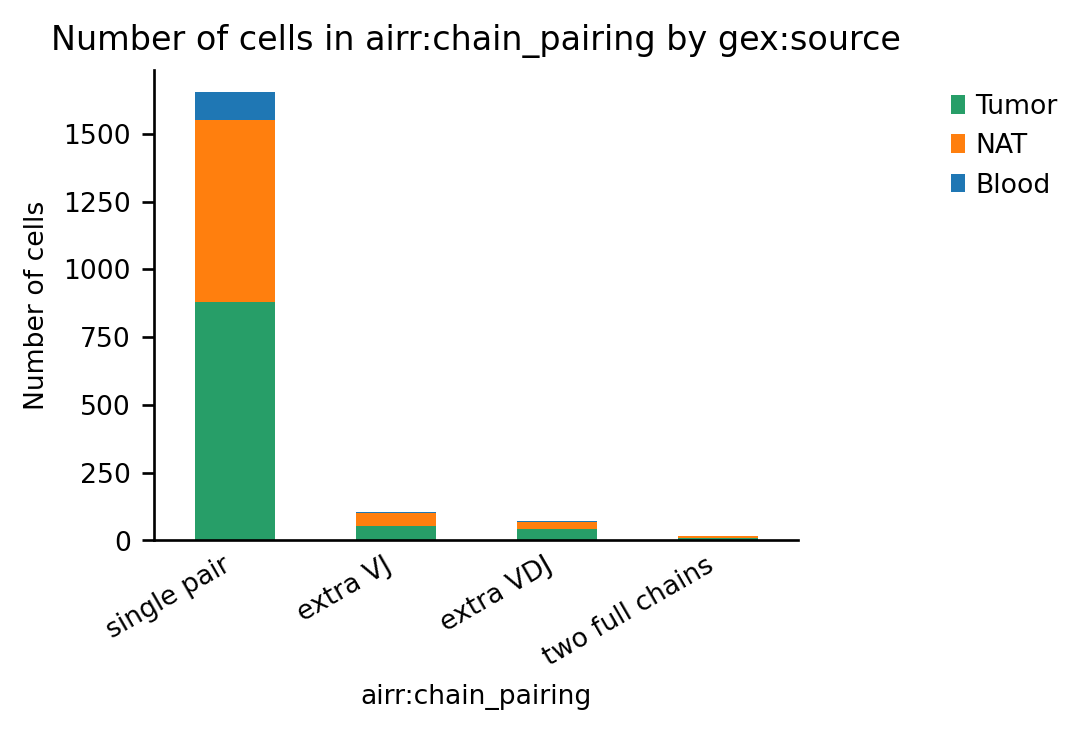

In [88]:
ax = ir.pl.group_abundance(mdata, groupby="airr:chain_pairing", target_col="gex:source")



## IR clonotypes and clonotype-clusters

- scirpy.pp.ir_dist() == Compute sequence-based distance matrices for all VJ and VDJ sequences.

- scirpy.tl.define_clonotypes() == Define clonotypes by nucleotide sequence identity.

- scirpy.tl.define_clonotype_clusters()==
Cluster cells by the similarity of their CDR3-sequences.

- scirpy.tl.clonotype_network() == Compute layout of the clonotype network.

- scirpy.pl.clonotype_network() == Plot clonotype network colored by different parameters.

In [89]:
#@title Based on Nucleotide clonotypes
# using default parameters, `ir_dist` will compute nucleotide sequence identity

ir.pp.ir_dist(mdata )

ir.tl.define_clonotypes(mdata, receptor_arms = "all", dual_ir = "primary_only")

ir.tl.clonotype_network(mdata, min_cells = 2)




Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/1526 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:clone_id"]`.
Stored result in `mdata.obs["airr:clone_id_size"]`.


In [90]:
#To visualize the network we first call scirpy.tl.clonotype_network() to compute the layout.
# We can then visualize it using scirpy.pl.clonotype_network()
#


ir.tl.clonotype_network(mdata, min_cells = 2)



In [92]:
mdata.obs.groupby("gex:source").size()

gex:source
Blood    107
NAT      755
Tumor    982
dtype: int64

<Axes: >

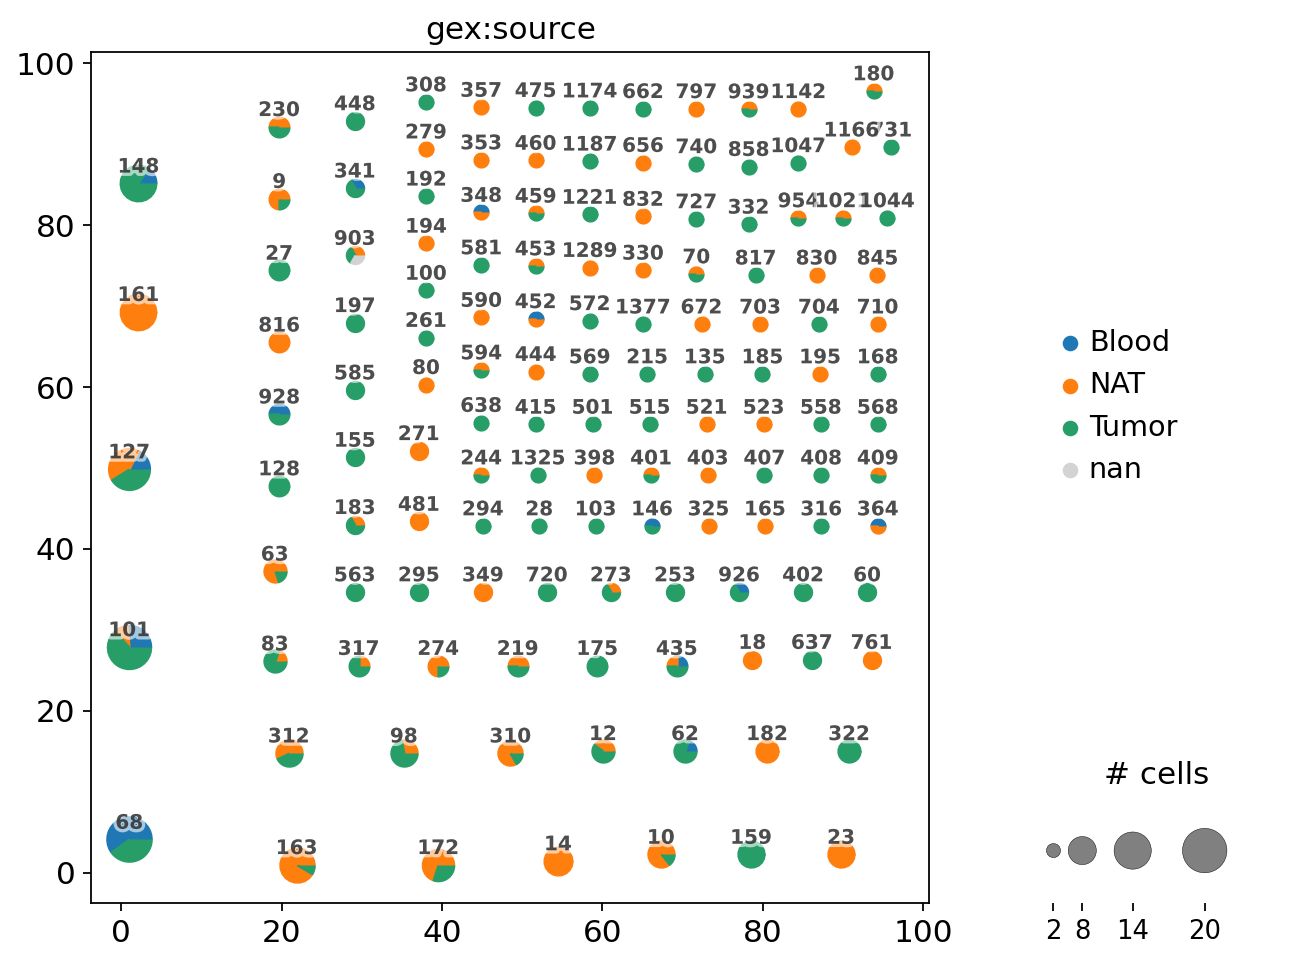

In [93]:

ir.pl.clonotype_network(
    mdata, color="gex:source", base_size=20, label_fontsize=9, panel_size=(7, 7)
)


Above plot shows IR clonotypes

> clonotypes are cells with identical CDR3 sequences

> Size shows number of cells


In [94]:

#@title Based on aminoacids- clonotypes
# using default parameters, `ir_dist` will compute nucleotide sequence identity

ir.pp.ir_dist(
    mdata,
    metric="alignment",
    sequence="aa",
    cutoff=15,
)

ir.tl.define_clonotype_clusters(
    mdata, sequence="aa", metric="alignment", receptor_arms="all", dual_ir="any"
)


ir.tl.clonotype_network(mdata, min_cells=3, sequence="aa", metric="alignment")




Computing sequence x sequence distance matrix for VJ sequences.


  0%|          | 0/496 [00:00<?, ?it/s]

Computing sequence x sequence distance matrix for VDJ sequences.


  0%|          | 0/496 [00:00<?, ?it/s]

Initializing lookup tables. 
Computing clonotype x clonotype distances.


  0%|          | 0/1549 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:cc_aa_alignment"]`.
Stored result in `mdata.obs["airr:cc_aa_alignment_size"]`.


In [95]:
mdata

MuData object with n_obs × n_vars = 1845 × 10608
  2 modalities
    gex:	1844 x 10608
      obs:	'cluster_orig', 'patient', 'sample', 'source', 'n_genes', 'n_counts', 'cluster'
      var:	'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'cluster_orig_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'gex:sample_colors', 'gex:patient_colors', 'gex:cluster_colors', 'gex:source_colors', 'airr:chain_pairing_colors'
      obsm:	'X_umap_orig', 'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'distances', 'connectivities'
    airr:	1845 x 0
      obs:	'high_confidence', 'is_cell', 'clonotype_orig', 'receptor_type', 'receptor_subtype', 'chain_pairing', 'clone_id', 'clone_id_size', 'cc_aa_alignment', 'cc_aa_alignment_size'
      uns:	'chain_indices', 'ir_dist_nt_identity', 'clone_id', 'clonotype_network', 'ir_dist_aa_alignment', 'cc_aa_alignment'
      obsm:	'airr', 'chain_indices', 'X_clonotype_network'

<Axes: >

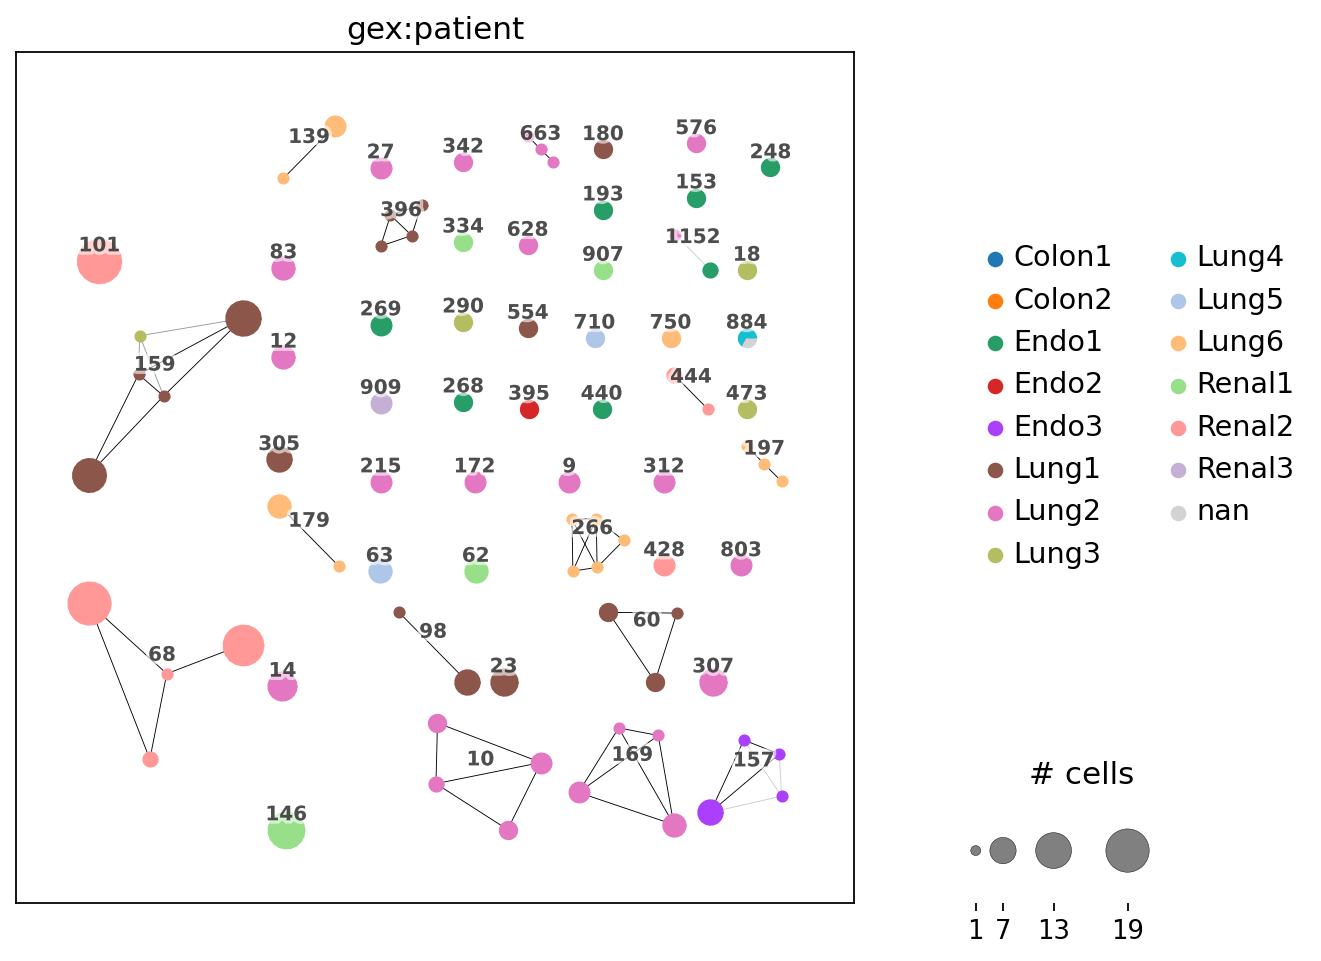

In [96]:

ir.pl.clonotype_network(
    mdata, color="gex:patient", label_fontsize=9, panel_size=(7, 7), base_size=20
)



> Aboe figure shows there are clonotypes and some clonotypes has many identical cells based on VJ and VDJ distance

> 101 & 68  clonotypes are same color -  are private clonotype (single patient only)

> 159 clonotype is -  public (many patient in single clonotype)




### Extract Specific Clonotype cluster
We can now extract information (e.g. CDR3-sequences) from a specific clonotype cluster by subsetting MuData

extraction by function:

```
ir.get.airr_context(mdata, junction , [list of chains])

```


In [97]:

with ir.get.airr_context(mdata, "junction_aa", ["VJ_1", "VDJ_1", "VJ_2", "VDJ_2"]):
    cdr3_ct_159 = (
        # TODO astype(str) is required due to a bug in pandas ignoring `dropna=False`. It seems fixed in pandas 2.x
        mdata.obs.loc[lambda x: x["airr:cc_aa_alignment"] == "159"]
        .astype(str)
        .groupby(
            [
                "VJ_1_junction_aa",
                "VDJ_1_junction_aa",
                "VJ_2_junction_aa",
                "VDJ_2_junction_aa",
                "airr:receptor_subtype",
            ],
            observed=True,
            dropna=False,
        )
        .size()
        .reset_index(name="n_cells")
    )
cdr3_ct_159




VJ_1_junction_aa VDJ_1_junction_aa VJ_2_junction_aa VDJ_2_junction_aa  \
0    CAGKAGNTGKLIF     CASSYQGSTEAFF              nan               nan   
1    CAGKSGNTGKLIF     CASSYQGATEAFF  CATDPRRSTGNQFYF               nan   
2    CAGKSGNTGKLIF     CASSYQGATEAFF              nan               nan   
3  CATDPRRSTGNQFYF     CASSYQGATEAFF    CAGKSGNTGKLIF               nan   
4  CATDPRRSTGNQFYF     CASSYQGATEAFF              nan               nan   

  airr:receptor_subtype  n_cells  
0               TRA+TRB        1  
1               TRA+TRB        1  
2               TRA+TRB       12  
3               TRA+TRB        1  
4               TRA+TRB       11

### CLonal Expansion

Clonal expansion refers to expansion types :    
- Singleton
- 2 cells clonotype
- more than 2 cells clonotype

```
ir.tl.clonal_expansion(mdata)

```



In [98]:

ir.tl.clonal_expansion(mdata)


Stored result in `mdata.obs["airr:clonal_expansion"]`.


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


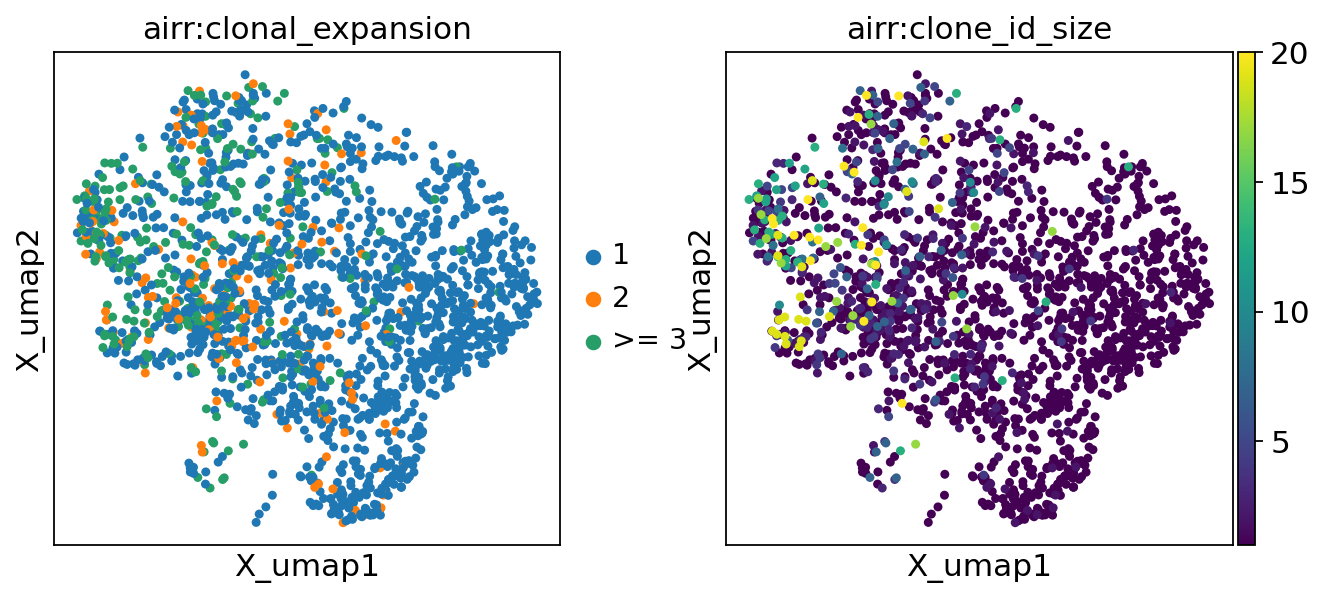

In [99]:

mu.pl.embedding(
    mdata, basis="gex:umap", color=["airr:clonal_expansion", "airr:clone_id_size"]
)


<Axes: >

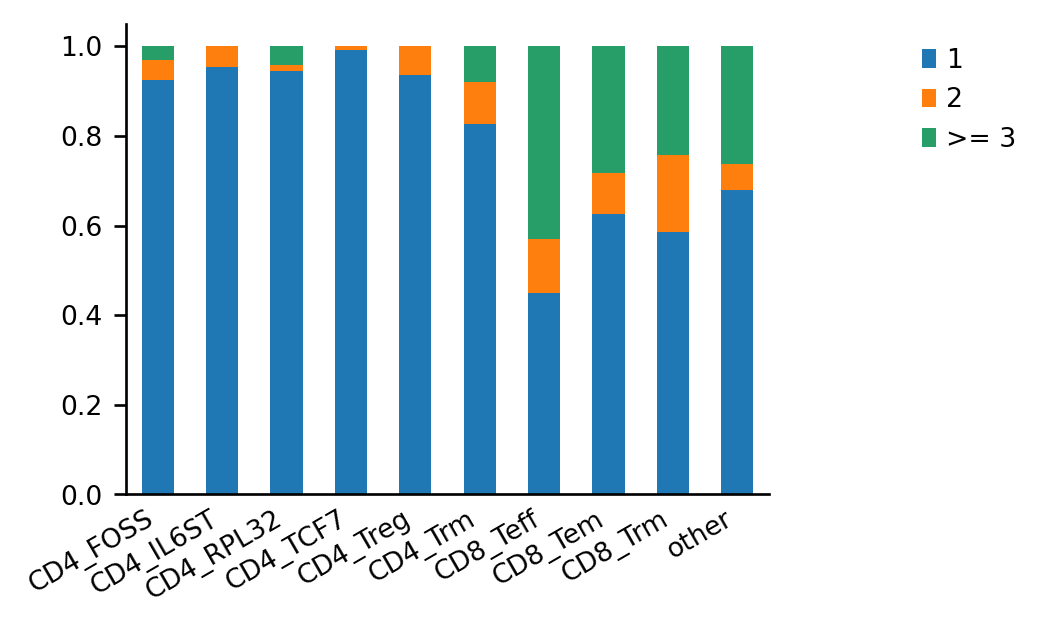

In [100]:
ir.pl.clonal_expansion(mdata, target_col="clone_id", groupby="gex:cluster")


<Axes: title={'center': 'Alpha diversity of clone_id by gex:cluster'}, ylabel='Normalized Shannon Entropy'>

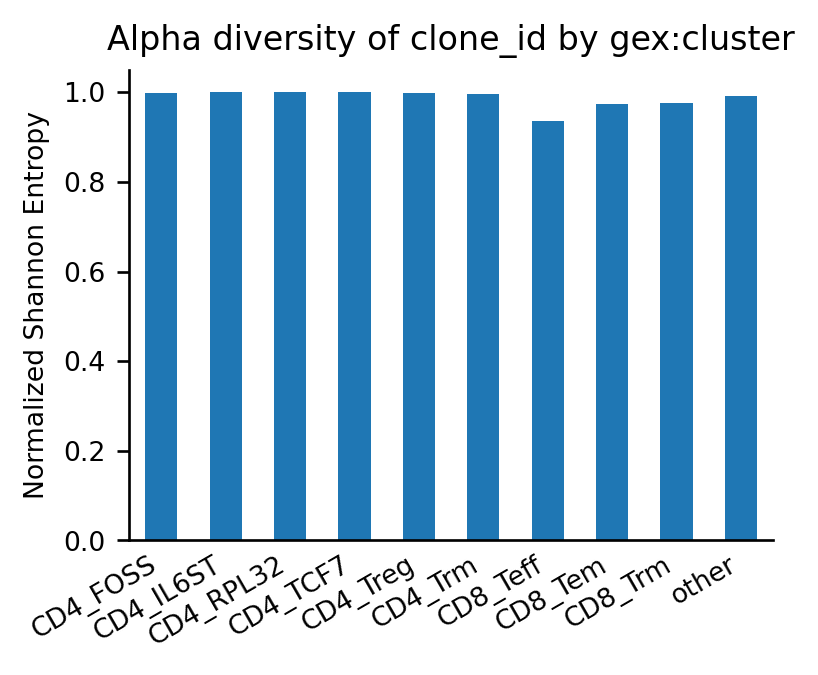

In [101]:
#@title Alpha diversity

ir.pl.alpha_diversity(
    mdata, metric="normalized_shannon_entropy", groupby="gex:cluster"
)


CD8 effector T cells have lowest alpha diversity


<Axes: title={'center': 'Fraction of gex:cluster in each airr:clone_id'}, xlabel='airr:clone_id', ylabel='Fraction of cells in gex:sample'>

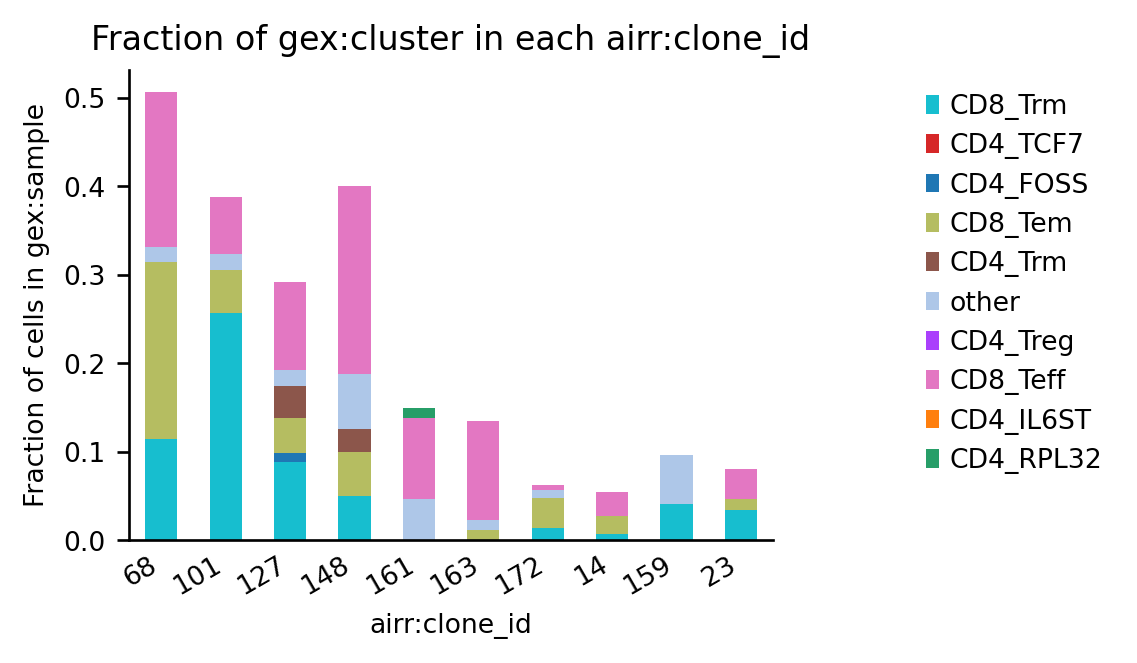

In [103]:
#@title Clonotype Abundance

ir.pl.group_abundance(
    mdata, groupby="airr:clone_id", target_col="gex:cluster", max_cols=10, normalize="gex:sample"
)


### Convergent evolution

Clonotype which recognize same antigen evolved from different clones


Stored result in `mdata.obs["airr:is_convergent"]`.


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


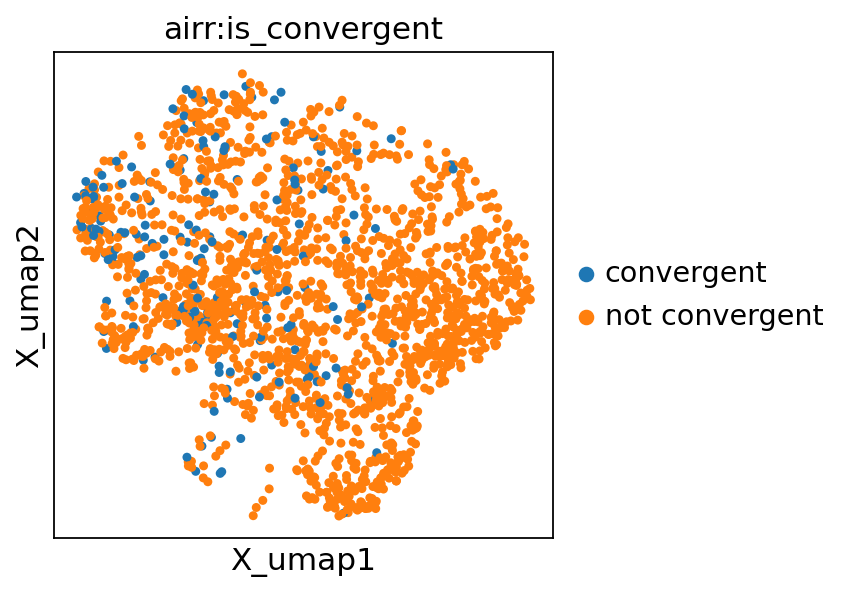

In [104]:

ir.tl.clonotype_convergence(mdata, key_coarse="cc_aa_alignment", key_fine="clone_id")

mu.pl.embedding(mdata, "gex:umap", color="airr:is_convergent")


### VJ , VDJ Gene Usage or Percentage of genes present in clonotype



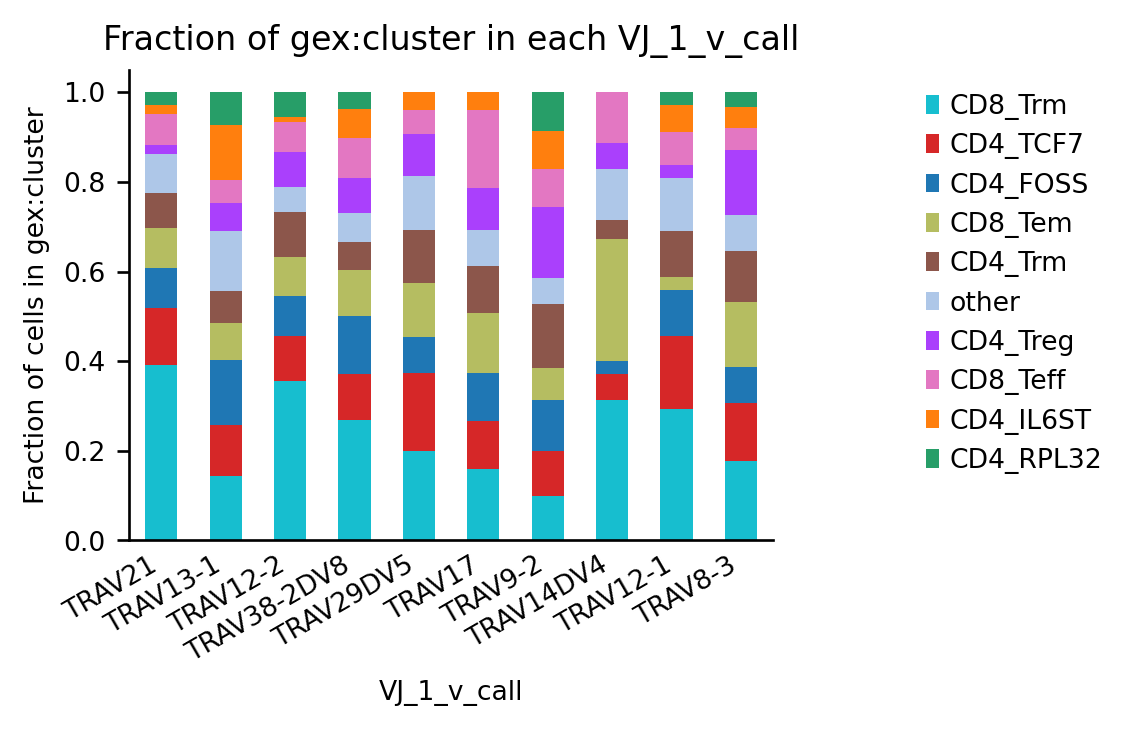

In [105]:

with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata,
        groupby="VJ_1_v_call",
        target_col="gex:cluster",
        normalize=True,
        max_cols=10,
    )


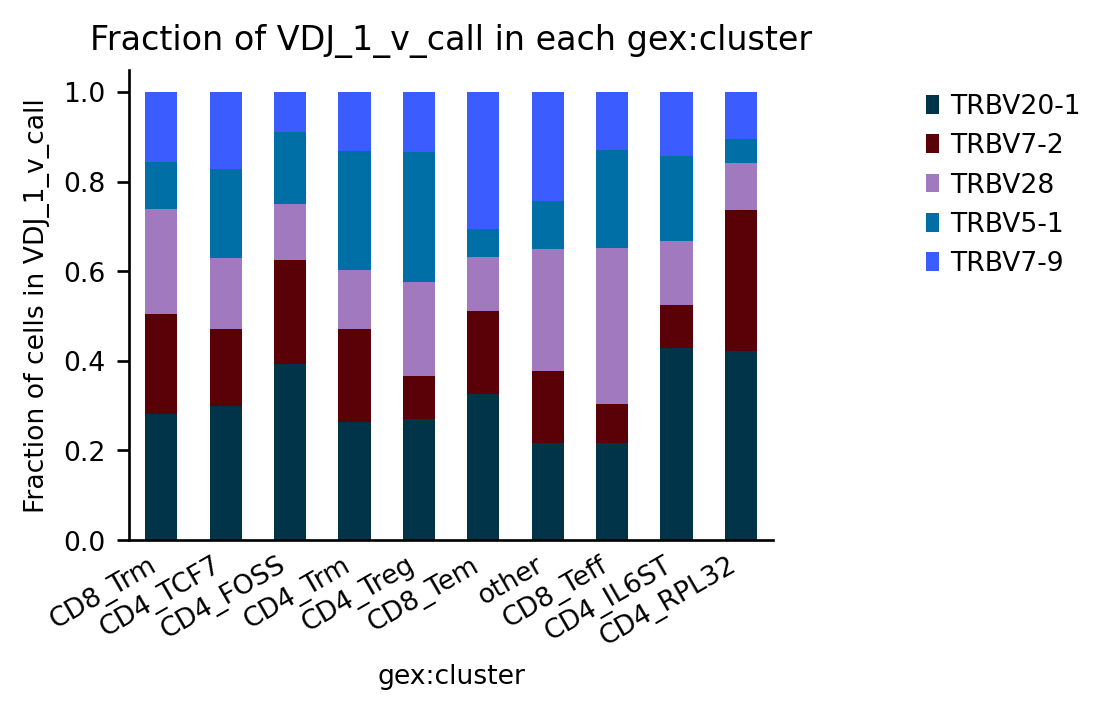

In [106]:

with ir.get.airr_context(mdata, "v_call"):
    ir.pl.group_abundance(
        mdata[
            mdata.obs["VDJ_1_v_call"].isin(
                ["TRBV20-1", "TRBV7-2", "TRBV28", "TRBV5-1", "TRBV7-9"]
            ),
            :,
        ],
        groupby="gex:cluster",
        target_col="VDJ_1_v_call",
        normalize=True,
    )


<Axes: >

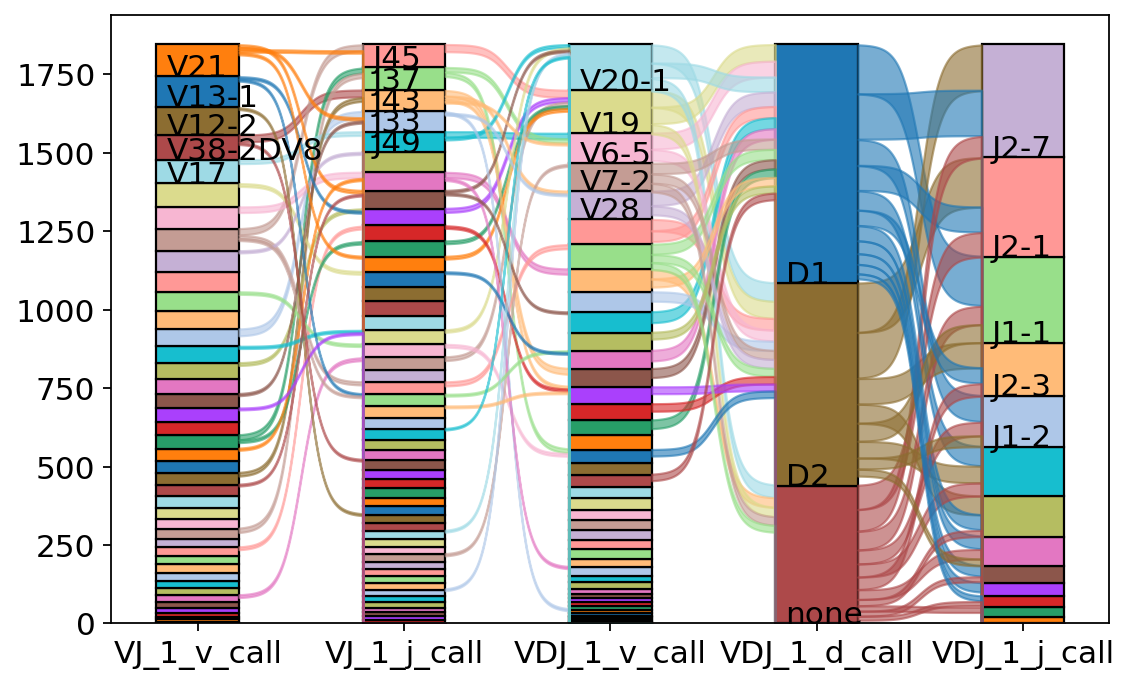

In [108]:

ir.pl.vdj_usage(
    mdata,
    full_combination=False,
    max_segments=None,
    max_ribbons=30,
    fig_kws={"figsize": (8, 5)},
)



### Spectratype - plot
spectratype() plots give us information about the length distribution of CDR3 regions.


<Axes: title={'center': 'Spectratype of junction_aa by gex:cluster'}, xlabel='junction_aa length', ylabel='Number of cells'>

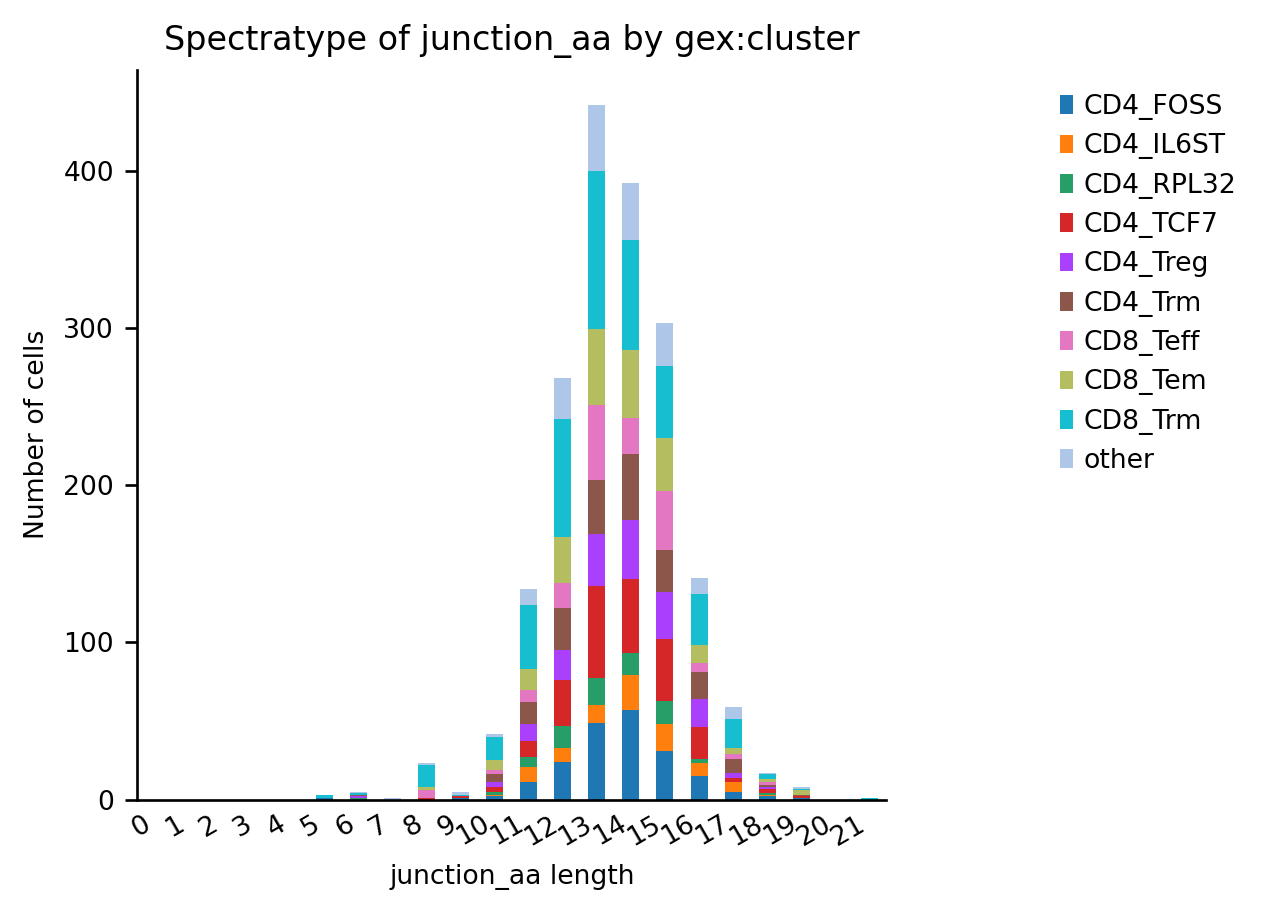

In [109]:
ir.pl.spectratype(mdata, color="gex:cluster", viztype="bar", fig_kws={"dpi": 120})



/usr/local/lib/python3.10/dist-packages/scirpy/pl/base.py:263: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(order)


<Axes: title={'center': 'Spectratype of junction_aa by gex:cluster'}, xlabel='junction_aa length'>

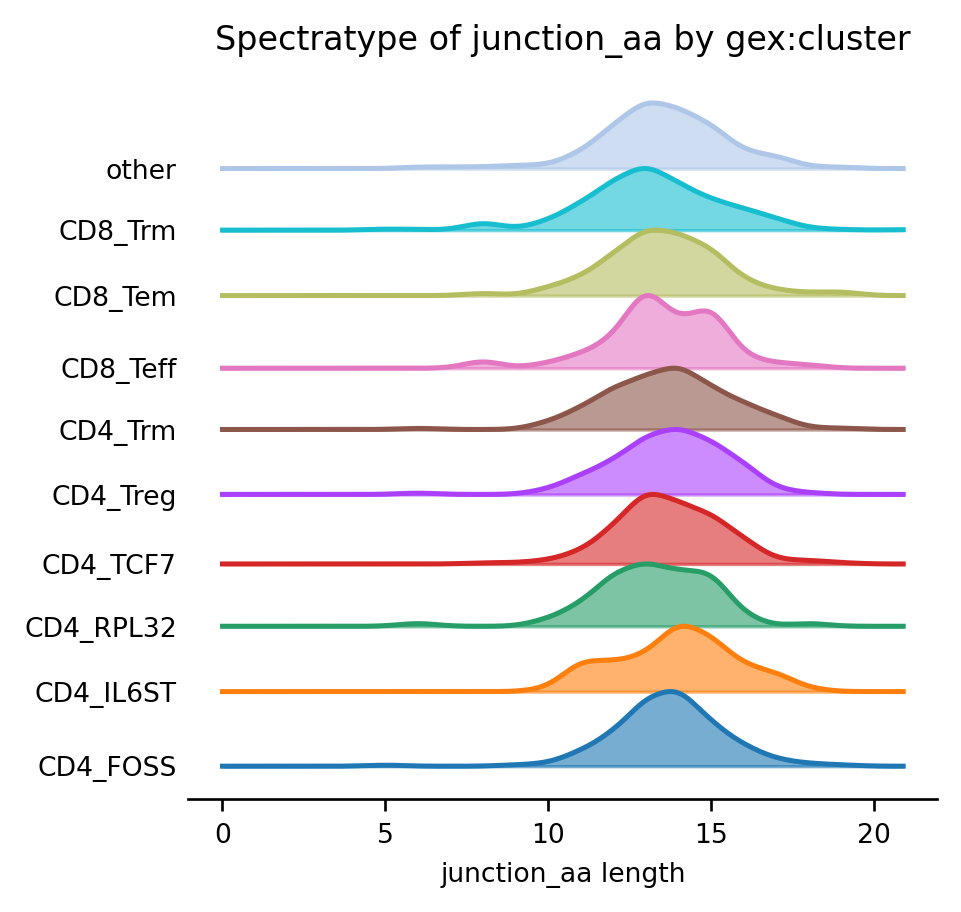

In [110]:

ir.pl.spectratype(
    mdata,
    color="gex:cluster",
    viztype="curve",
    curve_layout="shifted",
    fig_kws={"dpi": 120},
    kde_kws={"kde_norm": False},
)


## GEX + IR  
Leveraging the opportunity offered by close integeration with scanpy, transcriptomics-based data can be utilized alongside immune receptor data.



The clonotype modularity score represents the log2 fold change of the number of edges in the cell-cell neighborhood graph compared to the random background model. Clonotypes (or clonotype clusters) with a high modularity score consist of cells that have a similar molecular phenotype.



Initalizing clonotype subgraphs...


  0%|          | 0/1487 [00:00<?, ?it/s]

Computing background distributions...


  0%|          | 0/1000 [00:00<?, ?it/s]

Stored result in `mdata.obs["airr:clonotype_modularity"]`.
Stored result in `mdata.obs["airr:clonotype_modularity_fdr"]`.


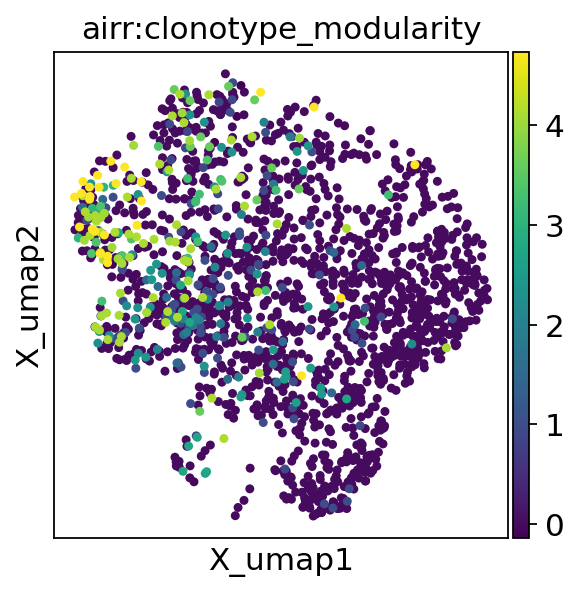

In [111]:
#@title Clonotype modularity

ir.tl.clonotype_modularity(mdata, target_col="airr:cc_aa_alignment")

mu.pl.embedding(mdata, basis="gex:umap", color="airr:clonotype_modularity")



<Axes: >

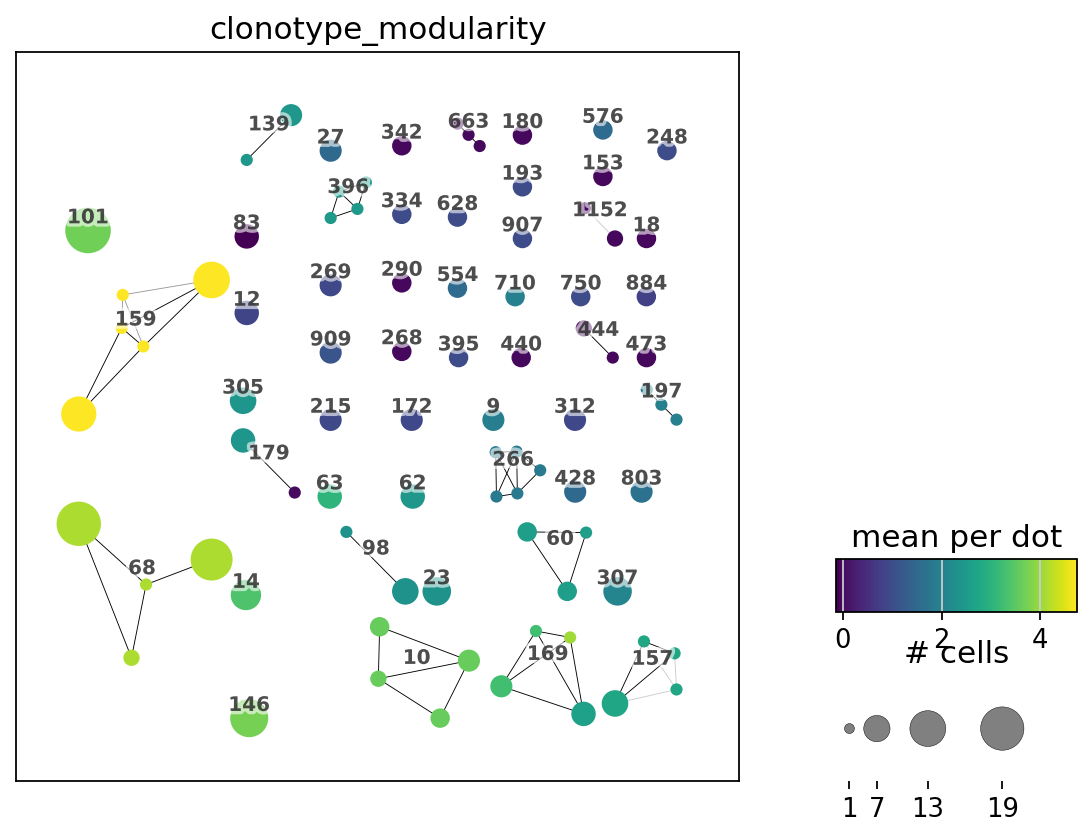

In [112]:

ir.pl.clonotype_network(
    mdata,
    color="clonotype_modularity",
    label_fontsize=9,
    panel_size=(6, 6),
    base_size=20,
)


<Axes: xlabel='modularity score', ylabel='-log10(FDR)'>

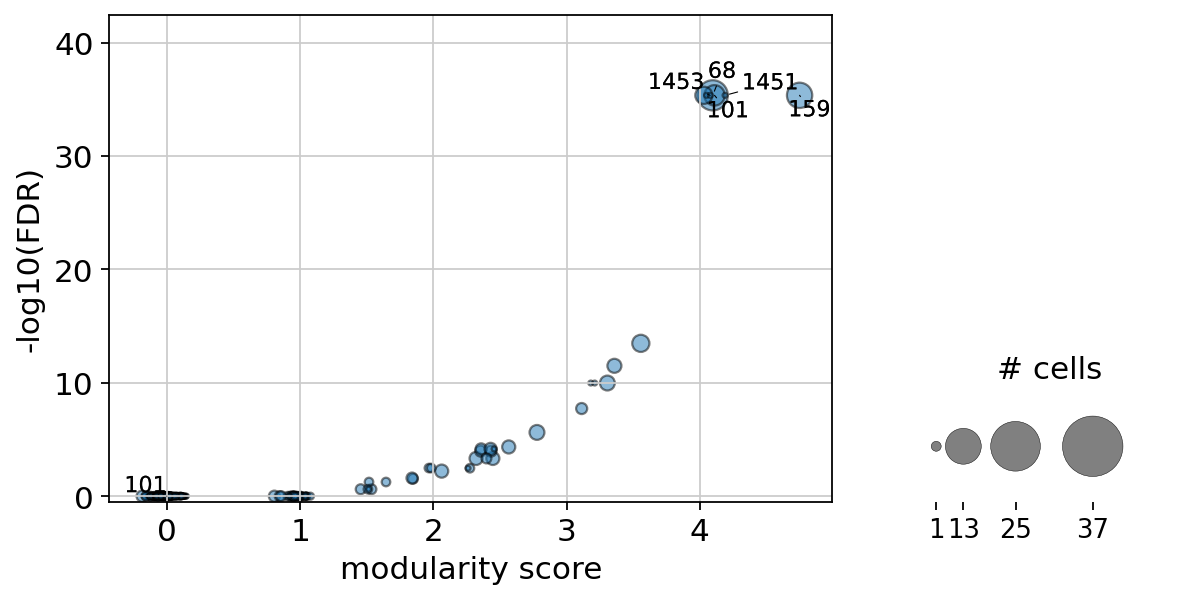

In [113]:
ir.pl.clonotype_modularity(mdata, base_size=20)


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


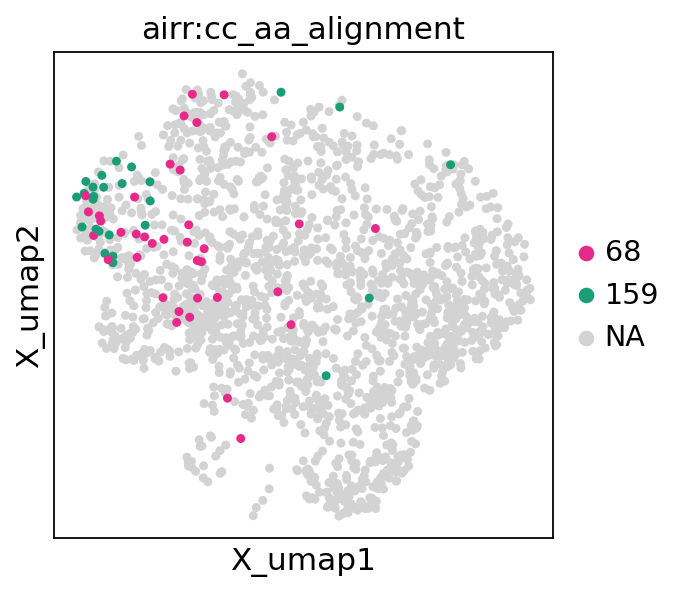

In [114]:

clonotypes_top_modularity = list(
    mdata.obs.set_index("airr:cc_aa_alignment")["airr:clonotype_modularity"]
    .sort_values(ascending=False)
    .index.unique()
    .values[:2]
)


test_ad = mu.pl.embedding(
    mdata,
    basis="gex:umap",
    color="airr:cc_aa_alignment",
    groups=clonotypes_top_modularity,
    palette=cycler(color=mpl_cm.Dark2_r.colors),
)




### Differential Gene expression



ranking genes
    finished (0:00:01)


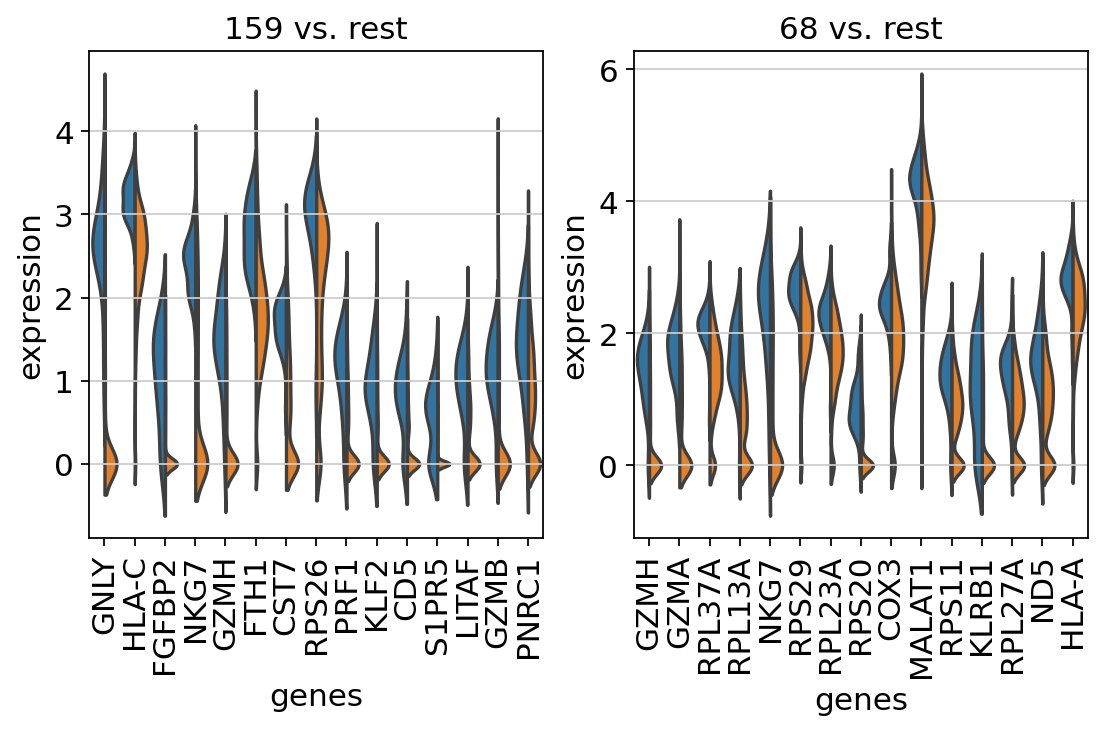

In [115]:

# Since sc.tl.rank_genes_group does not support MuData, we need to temporarily add
# the AIRR columns to the gene expression AnnData object
with ir.get.obs_context(
    mdata["gex"], {"cc_aa_alignment": mdata.obs["airr:cc_aa_alignment"]}
) as tmp_ad:
    sc.tl.rank_genes_groups(
        tmp_ad,
        "cc_aa_alignment",
        groups=clonotypes_top_modularity,
        reference="rest",
        method="wilcoxon",
    )
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    for ct, ax in zip(clonotypes_top_modularity, axs):
        sc.pl.rank_genes_groups_violin(
            tmp_ad, groups=[ct], n_genes=15, ax=ax, show=False, strip=False
        )

